In [35]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

---
## *Individual house price estimation in Boston area based on its characteristics.* 
#### *Which features are more and less important in determining the house price?*
---

---
### Gather Data:
---
[Source: scikit learn datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston)

In [2]:
dataset = load_boston()
# dataset source/description, num of instances, features number/names/description ?
print(dir(dataset))
print(dataset.DESCR) 

['DESCR', 'data', 'feature_names', 'filename', 'target']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-

In [3]:
print(dataset.data.shape) # 506 instances (datapoints) , 13 features
print(dataset.feature_names)

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
print(dataset.target) # MEDV Median value of owner-occupied homes in $1000's

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

---
### *Data Exploration and Visualization:*
---
##### *Exploration: Pandas dataframes*

In [5]:
data = pd.DataFrame(data=dataset.data, columns=dataset.feature_names) # create dataframe out of the Bunch object
data['MEDV'] = dataset.target # include the target column

In [6]:
data.head() # top rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
data.tail() # bottom rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [8]:
data.count() # number of rows for each col

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
MEDV       506
dtype: int64

##### *Checking for missing data:*

In [9]:
pd.isnull(data) # pandas methods

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [11]:
data.info() # dataframe method

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


##### *Visualization:*
[Histograms:](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)
##### *Histograms show the number of instances in the data that have a certain value, it shows the frequency of a paricular value. The taller the individual bar, the more occurences there are in the dataset.*
#####  *By plotting all the bars next to each other it gets a certain shape, this shape is the distribution of the data.*
##### [https://seaborn.pydata.org/introduction.html#informative-distributional-summaries](https://seaborn.pydata.org/introduction.html#informative-distributional-summaries)
##### [https://seaborn.pydata.org/tutorial/distributions.html](https://seaborn.pydata.org/tutorial/distributions.html)

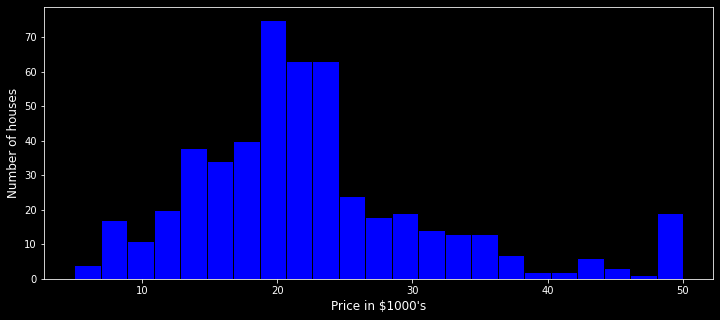

In [12]:
plt.style.use('dark_background')
plt.figure(figsize=[12, 5])
plt.xlabel('Price in $1000\'s', fontsize=12)
plt.ylabel('Number of houses', fontsize=12)
plt.hist(data['MEDV'], bins='auto', ec='black',color='b') # about bins: https://stackoverflow.com/a/33459231/14776026
plt.show()

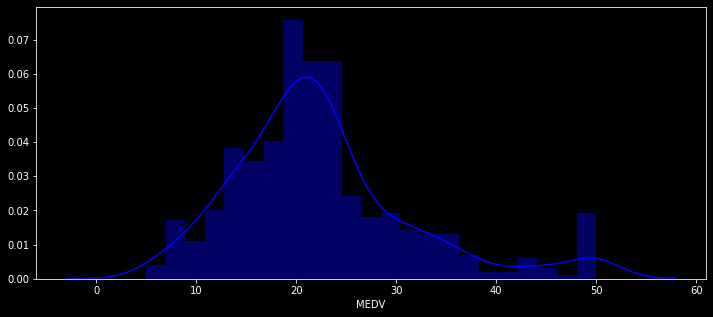

In [13]:
# the line is an estimate of the Probability Density Function (estimates distribution of data)
plt.figure(figsize=[12, 5])
sns.distplot(data['MEDV'], bins='auto',color='blue')
plt.show()

##### *Histograms may also be used to visualize individual features distribution, for example, the number of rooms:*
##### *With a quick look it's possible to figure out what the average number of rooms might be. (around 6)*

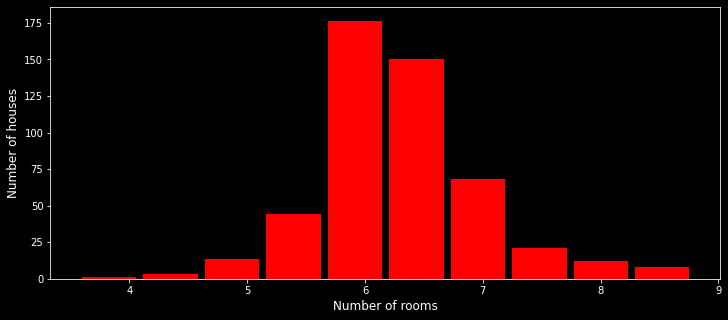

In [14]:
plt.figure(figsize=[12, 5])
plt.xlabel('Number of rooms', fontsize=12)
plt.ylabel('Number of houses', fontsize=12)
plt.hist(data['RM'], ec='black',color='red', rwidth=0.9) # about bins: https://stackoverflow.com/a/33459231/14776026
plt.show()

In [15]:
# using pandas to get the exact number for the avg.
print(data['RM'].mean())

6.284634387351779


##### *Accessibility to highways:*

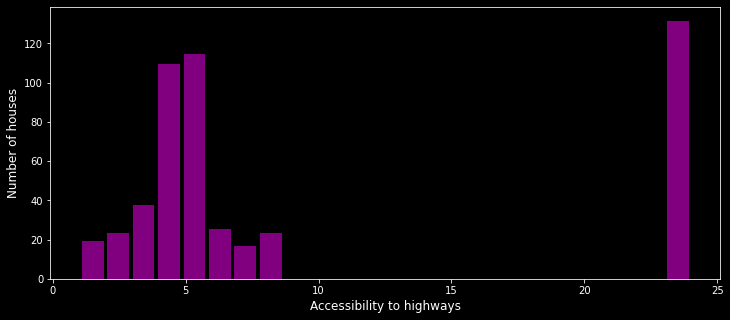

In [16]:
plt.figure(figsize=[12, 5])
plt.xlabel('Accessibility to highways', fontsize=12)
plt.ylabel('Number of houses', fontsize=12)
plt.hist(data['RAD'], bins=24, ec='black', color='purple', rwidth=0.9) # about bins: https://stackoverflow.com/a/33459231/14776026
plt.show()

In [17]:
data['RAD'].value_counts() # counts how many occurences of each value

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

##### *The above histogram looks like a bar chart (because it's measured as an index value).*
##### *In this case it's better to use a bar chart and avoid hardcoded bins value:*

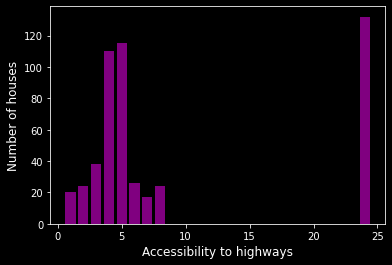

In [18]:
frequency = data['RAD'].value_counts()
plt.xlabel('Accessibility to highways', fontsize=12)
plt.ylabel('Number of houses', fontsize=12)
plt.bar(frequency.index, height=frequency, color='purple')
plt.show()

---
#### *Statistical descriptions:*

In [19]:
data.describe() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### *Correlation is the degree to which things move together*
##### **Positive correlation:** *If one thing is high, the other thing tends to be high as well.* (+1)
##### **Negative correlation:** *If ne thing is high, the other thing tends to be low.* (-1)
#### $\rho_{XY} = corr(X, Y)$ , $ -1.0 \leq \rho_{X,Y} \leq +1.0 $

In [20]:
# house price vs number of rooms
print('Correlation (house price vs number of rooms):', data['MEDV'].corr(data['RM']))
'Correlation (house price vs pupil/teacher ratio):', 
# house price vs PTRATIO (pupil teacher ratio)
# PTRATIO measures schools quality. The higher the ratio, lower the quality of education tends to be.
# quality of education reflects on house prices. (lower quality -> high PTRATIO -> lower prices)
print('Correlation (house price vs pupil/teacher ratio):', data['MEDV'].corr(data['PTRATIO']))

Correlation (house price vs number of rooms): 0.6953599470715393
Correlation (house price vs pupil/teacher ratio): -0.5077866855375616


In [21]:
# whole correlation table
data.corr() # pearson

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [22]:
# get rid of duplicate values
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
print(mask)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


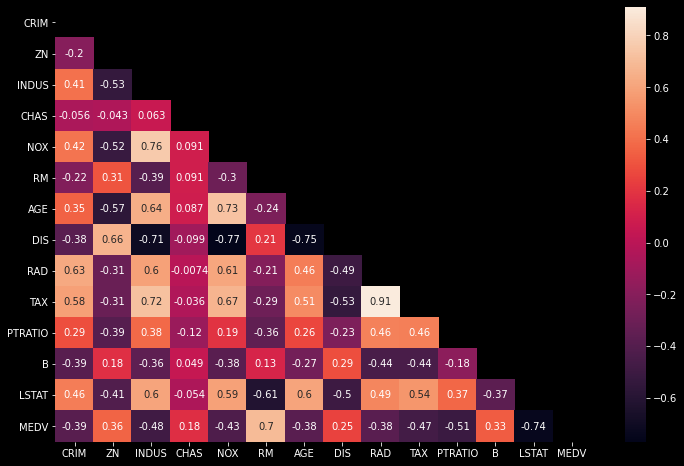

In [23]:
plt.figure(figsize=[12, 8])
sns.heatmap(data.corr(), mask=mask, annot=True)
plt.show()

##### Pearson correlation does not work for discrete values!
##### *Can it be simplified by excluding irrelevant data?*
##### *Tests for possible multicollineatiry?*
### *Correlation does **not** imply causation*
---

---
#### *Visualization with scatter plots:*
---

##### *matplotlib:*

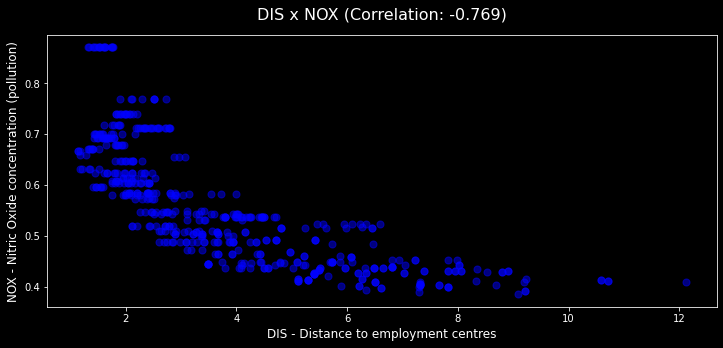

In [24]:
dis_nox_corr = round(data['DIS'].corr(data['NOX']), 3)
plt.figure(figsize=[12, 5])
plt.title(f'DIS x NOX (Correlation: {dis_nox_corr})', fontsize=16, pad=16)
plt.xlabel('DIS - Distance to employment centres', fontsize=12)
plt.ylabel('NOX - Nitric Oxide concentration (pollution)', fontsize=12)

plt.scatter(x=data['DIS'], y=data['NOX'], c='b', s=50, alpha=0.5)
plt.show()

##### *seaborn:*

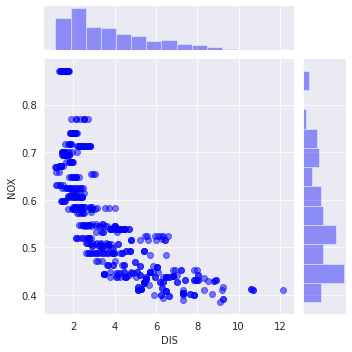

In [25]:
sns.set_style('darkgrid')
sns.jointplot(x=data['DIS'], y=data['NOX'], color='b', height=5, joint_kws={'alpha': 0.5})
plt.show()

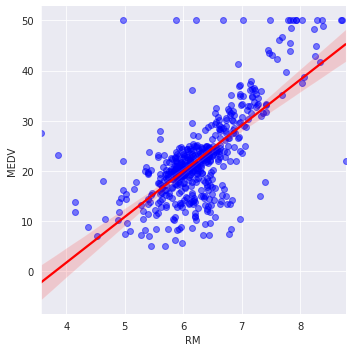

In [26]:
# .lmplot() - Plot data and regression model fits across a FacetGrid.
sns.lmplot(x='RM', y='MEDV', data=data, height=5, 
           scatter_kws={'color':'blue', 'alpha':0.5}, line_kws={'color':'red'})
plt.show()

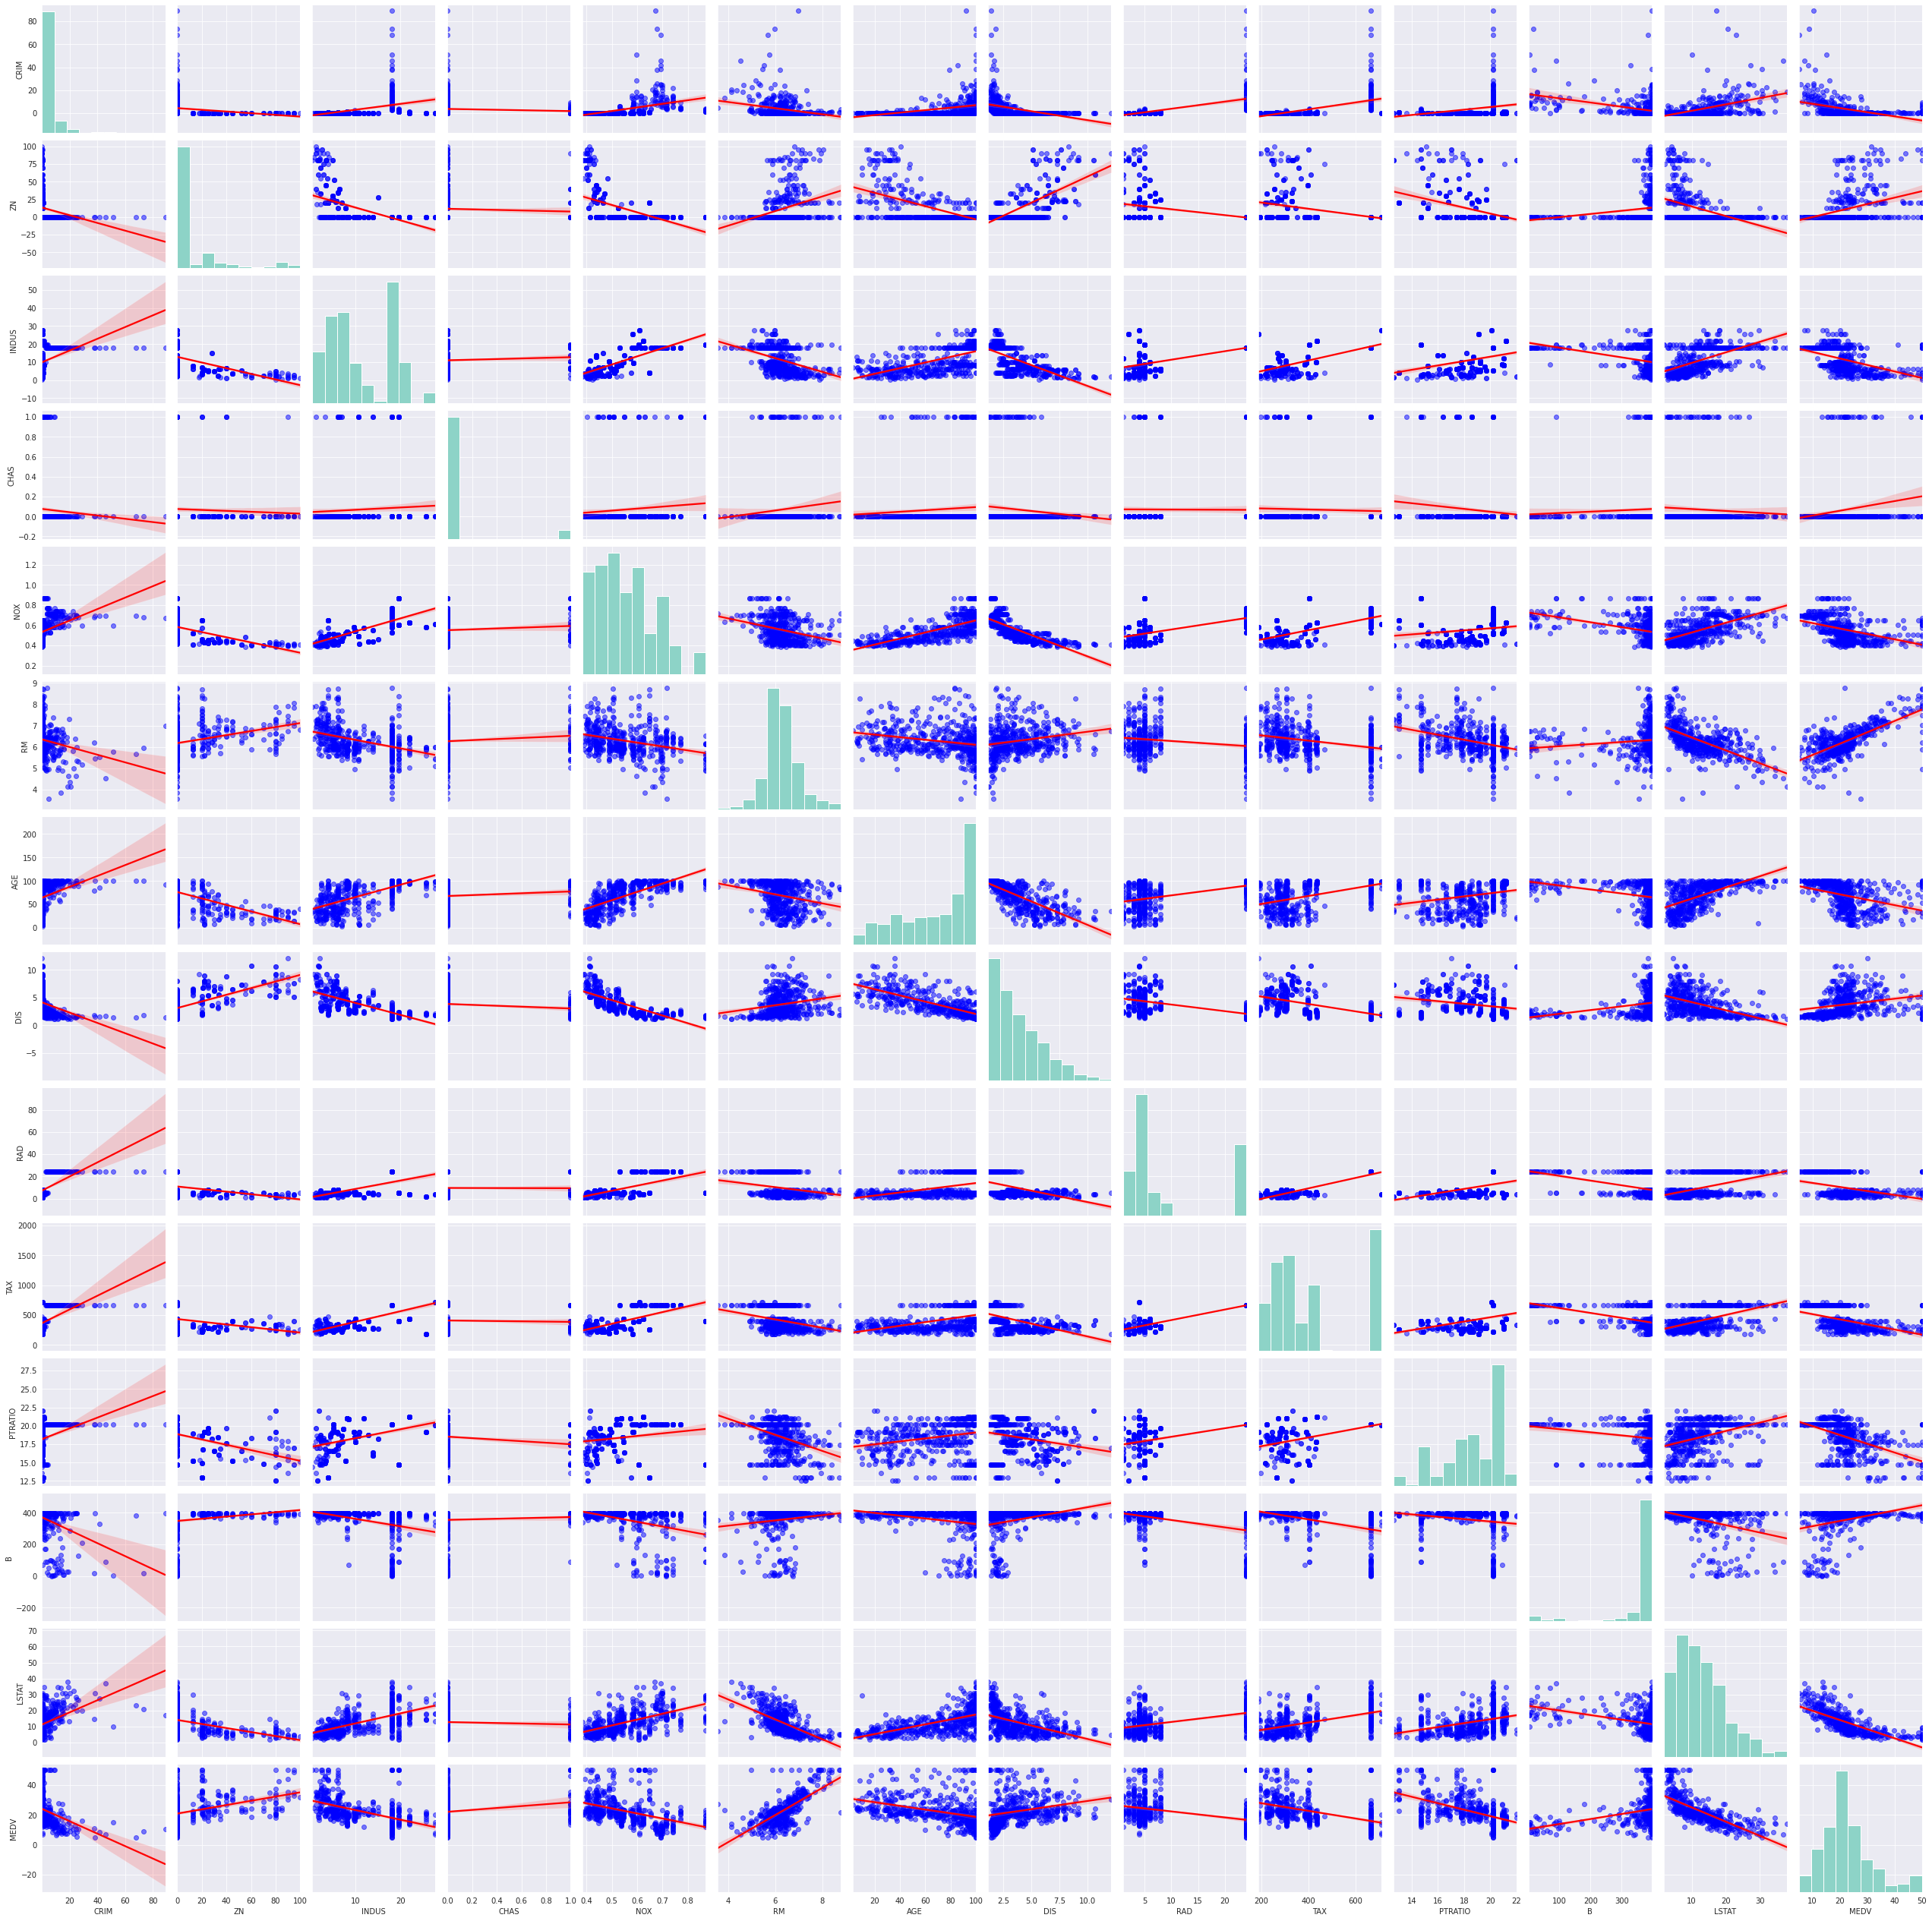

CPU times: user 1min 9s, sys: 366 ms, total: 1min 10s
Wall time: 1min 9s


In [27]:
%%time
sns.pairplot(data, kind='reg',
            plot_kws={'scatter_kws':{'color':'blue', 'alpha':0.5}, 'line_kws':{'color':'red'}})
plt.show()

#### *The image above shows scatter plots for every single column in the data frame, as well as the regression line to support the visualization of the correlation between them.*
---

---
### *Model: Multivariable regression*
---

##### *Shuffle and split training/test data:*

In [29]:
target = data['MEDV']
features = data.drop('MEDV', axis=1)

# tuple unpacking (random_state used for replicability)
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.2, random_state=10)

In [33]:
print('Features train size: ', len(X_train)/len(features))

Features train size:  0.7984189723320159


##### *Train algorithm:*

In [48]:
reg = LinearRegression().fit(X_train, y_train)
# R² for training and test data
print('R-Squared (Training data): ', reg.score(X_train, y_train))
print('R-Squared (Test data): ', reg.score(X_test, y_test))
# intercept and coefs
print('Intercept: ', reg.intercept_)
pd.DataFrame(data=reg.coef_, index=X_train.columns, columns=['coefficient'])

R-Squared (Training data):  0.750121534530608
R-Squared (Test data):  0.6709339839115651
Intercept:  36.533051382824596


,coefficient
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


#### *The table above clearly shows the impact each feature has on the target*
---